In [1]:

import urllib

data = 'https://ceit.aut.ac.ir/~khalooei/courses/9899/sml/data/sample1.data'

f = urllib.request.urlopen(data)           
myfile = f.read()  
# print(myfile)
d = str(myfile).split(' ')
# print(d)
d = [t for t in d if len(t)>0]
d = d[11:]
d = [float(d[5*i+3]) for i in range(int(len(d)/5))]
# for i in range(len(d)):
#     print(d[i])

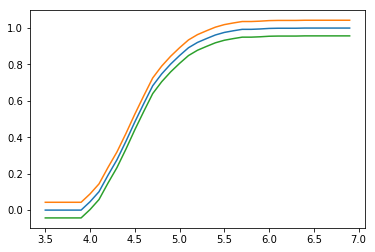

In [3]:

import matplotlib.pyplot as plt
import numpy as np
rr = np.arange(3.5, 7, 0.1)

def F_hat(x):
    hits = 0
    for i in range(len(d)):
        if x >= d[i]:
            hits+=1
    return hits/len(d)
n = len(d)
eps = np.sqrt((1/(2*n)) * np.log(2/0.05))
# se = np.sqrt(np.var(d))
def y(x):
#     print(x)
    return np.array([F_hat(t) for t in x])
def y2(x):
    return np.array([max(F_hat(t)+eps,0) for t in x])
def y3(x):
    return np.array([min(F_hat(t)-eps,1) for t in x])
plt.plot(rr, y(rr).astype(np.float))
plt.plot(rr, y2(rr).astype(np.float))
plt.plot(rr, y3(rr).astype(np.float))
plt.show()



In [6]:
# c
other_se = np.sqrt(2 * np.var(d))
print((F_hat(4.9)-F_hat(4.3))-1.95*other_se," , ",(F_hat(4.9)-F_hat(4.3))+1.95*other_se)
print((F_hat(4.9)-F_hat(4.3))-1.81*other_se," , ",(F_hat(4.9)-F_hat(4.3))+1.81*other_se)

-0.584178140300015  ,  1.636178140300015
-0.5044730430477062  ,  1.5564730430477063
